# Tutorial #3

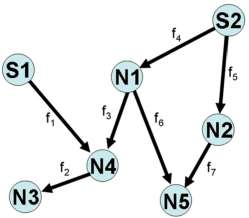

1. Consider the following network shown in figure above consisting of two power supply stations denoted by `S1` and `S2` and five power recipient nodes denoted by `N1` to `N5`. The nodes are connected by power lines, which are denoted by arrows, and power can flow between nodes along these lines in both directions.
Let $d_i$ be a positive scalar denoting the power demand for node $i$; assume that this demand must be met exactly. The capacity of the power supply stations is denoted by $S$. Power supply stations must run at capacity. For each arrow, let $f_j$ be the power flow along that arrow. Negative flow implies that power is running in the opposite direction of the arrow.
Write a function `my_flow_calculator(S,d)` where `S` is a $1\times2$ vector representing the capacity of each power supply station, and `d` is a $1\times5$ row vector representing the demands at each node (i.e., $d[0]$ is the demand at node $1$). The output argument, `f`, should be a $1\times7$ row vector denoting the flows in the network (i.e., `f[0] =` $f_1$ in the diagram). The flows contained in `f` should satisfy all the constraints of the system, like power generation and demands. Note that there may be more than one solution to the system of equations.
The total flow into a node must equal the total flow out of the node plus the demand; that is, for each node $i$, $f_{inflow} = f_{outflow} + d_i$. You may assume that $\Sigma S_j = \Sigma d_i$.

In [ ]:
import numpy as np
import numpy.linalg as la

A = np.array([[1,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  1,  1,  0,  0],
              [0,  0, -1,  1,  0, -1,  0],
              [0,  0,  0,  0,  1,  0, -1],
              [0,  1,  0,  0,  0,  0,  0],
              [1, -1,  1,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  1,  1]])

In [ ]:
## Test Case #1
s = np.array([[10,10]])
d = np.array([[4,4,4,4,4]])

In [ ]:
B = np.array([[s[0,0]],[s[0,1]],[d[0,0]],[d[0,1]],[d[0,2]],[d[0,3]],[d[0,4]]])

A_rank = np.linalg.matrix_rank(A)
print('A_rank = ', A_rank)

f = la.solve(A,B)

The function `numpy.linalg.solve` above throws error because the determinant of matrix $A$ equals to zero, which means that the system has no solution or infinitely many solutions. Fortunately, we can use the function `scipy.optimize.lsq_linear` and also we can also constrain the solution so that it makes physically sense.

In [ ]:
from scipy.optimize import lsq_linear

def my_flow_calculator(S,d):
    A = np.array([[1,  0,  0,  0,  0,  0,  0],
                  [0,  0,  0,  1,  1,  0,  0],
                  [0,  0, -1,  1,  0, -1,  0],
                  [0,  0,  0,  0,  1,  0, -1],
                  [0,  1,  0,  0,  0,  0,  0],
                  [1, -1,  1,  0,  0,  0,  0],
                  [0,  0,  0,  0,  0,  1,  1]])
    
    B = np.array([[s[0,0]],[s[0,1]],[d[0,0]],[d[0,1]],[d[0,2]],[d[0,3]],[d[0,4]]])
    # print(B.shape)
    
    A_B = np.concatenate((A, B), axis = 1)
    A_B_rank = np.linalg.matrix_rank(A_B)
    print('A_B_rank = ', A_B_rank)
    
    B = B.reshape((B.shape[0]))
    # print(B.shape)
    
    our_bounds = np.array([[0,     -np.inf, -np.inf, 0,      0,     -np.inf, -np.inf],
                           [np.inf, np.inf,  np.inf, np.inf, np.inf, np.inf, np.inf]])
    
    res = lsq_linear(A, B, bounds = our_bounds)
    f = res.x
    
    return f

## Test Case #1
s = np.array([[10, 10]])
d = np.array([[4, 4, 4, 4, 4]])

f = my_flow_calculator(s, d)
print('f = ', f)

In [ ]:
## Test case #2
s = np.array([[10, 10]])
d = np.array([[3, 4, 5, 4, 4]])

f = my_flow_calculator(s, d)
print('f = ', f)

In [ ]:
## Test case #3
s = np.array([[5, 10]])
d = np.array([[3, 4, 5, 4, 4]])

f = my_flow_calculator(s, d)
print('f = ', f)